### IDs:
Insert yours IDs to the cell below

ID #1: 205789167

ID #2: 315535351


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load `Diabetes` dataset from sklearn.
Explore the data. Follow the instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. Describe the dataset. How many samples does it contain? How many features? What is the data type for each variable?
2. Produce a histogram and a boxplot of all the features.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot).
5. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from scipy.stats import norm, bernoulli, binom, uniform
from numpy.linalg import matrix_power

#### Solution - Question 1.1

Import the dataset from the sklearn package

In [2]:
df = datasets.load_diabetes(return_X_y=True, scaled = False, as_frame=True)[0]
target = datasets.load_diabetes(return_X_y=True, as_frame=True)[1]

##### 1. Describe the dataset


In [3]:
# Number of featrues in the dataset
len(df.columns)

10

In [4]:
# Number of samples in the dataset
len(df)

442

In [5]:
# Names of the features:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [6]:
# Describe the dataframe
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000



we can see that we have 442 samples in the dataset.

The dataset contains 10 features.

The features are: 'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', and 's6'

According to the reference article, s1..s6 are serum measures.

https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf

In [7]:
# Find the datatype of each feature

# Side Note:
# Info() also returns all the answers for the questions above, but I just wanted to show how we can extract them using low-level code.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [8]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: target
Non-Null Count  Dtype  
--------------  -----  
442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


All the data types are of type float64,  which means they are numeric decimal numbers.

The target column is an integer which is a measure of disease progression one year after baseline.

In Scikit-Learn dataset we can also have the full description of the dataset.

In [9]:
print(datasets.load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Solution - Question 1.2

##### Histogram
The trend of each feature will be hard to recognize if we visualize all the features together.

<Axes: ylabel='Count'>

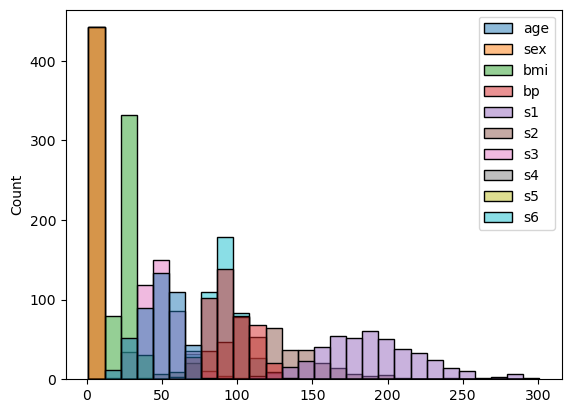

In [10]:
sns.histplot(df)

As we can't recognize anything on those features, we'll plot them separately and analyze them separately.

##### Plotting (subplots) Histograms

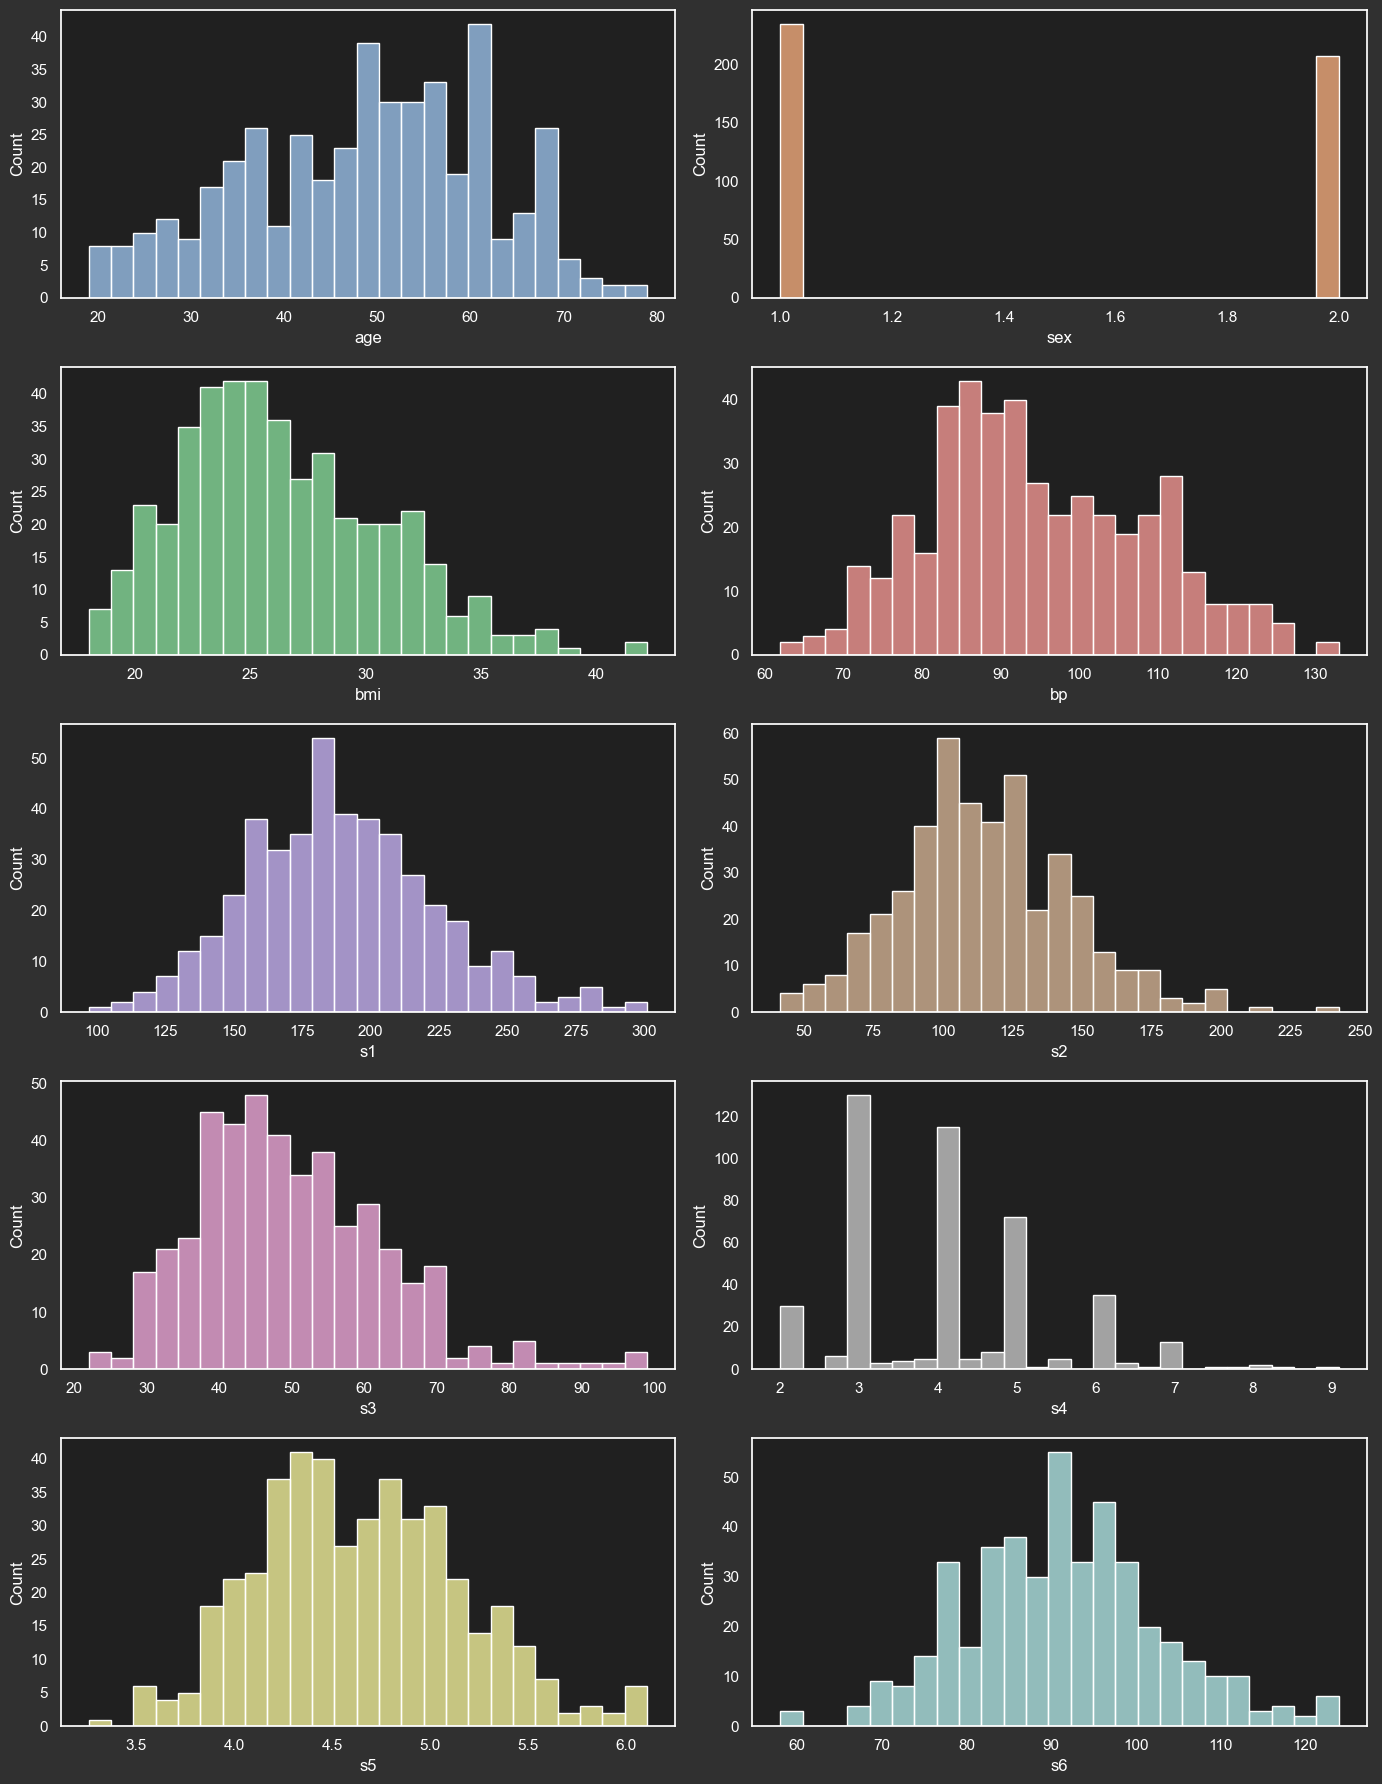

In [11]:
sns.set(style="dark")
fig, axs = plt.subplots(int(len(df.columns)//2), 2, figsize=(14, 18))
fig.patch.set_facecolor('#303030')
index = 0
for i in range(int(len(df.columns)/2)):
    for j in range(2):
        sns.histplot(data=df.iloc[:,index], ax = axs[i,j], color = sns.color_palette("pastel")[index],bins=25)
        axs[i, j].set_facecolor('#202020')
        axs[i, j].tick_params(axis='x', colors='white')
        axs[i, j].tick_params(axis='y', colors='white')
        axs[i, j].xaxis.label.set_color('white')
        axs[i, j].yaxis.label.set_color('white')
        axs[i, j].spines['bottom'].set_color('white')
        axs[i, j].spines['left'].set_color('white')
        index+=1
plt.tight_layout()
plt.show()


##### Boxplots

##### Plotting (subplots) BoxPlots

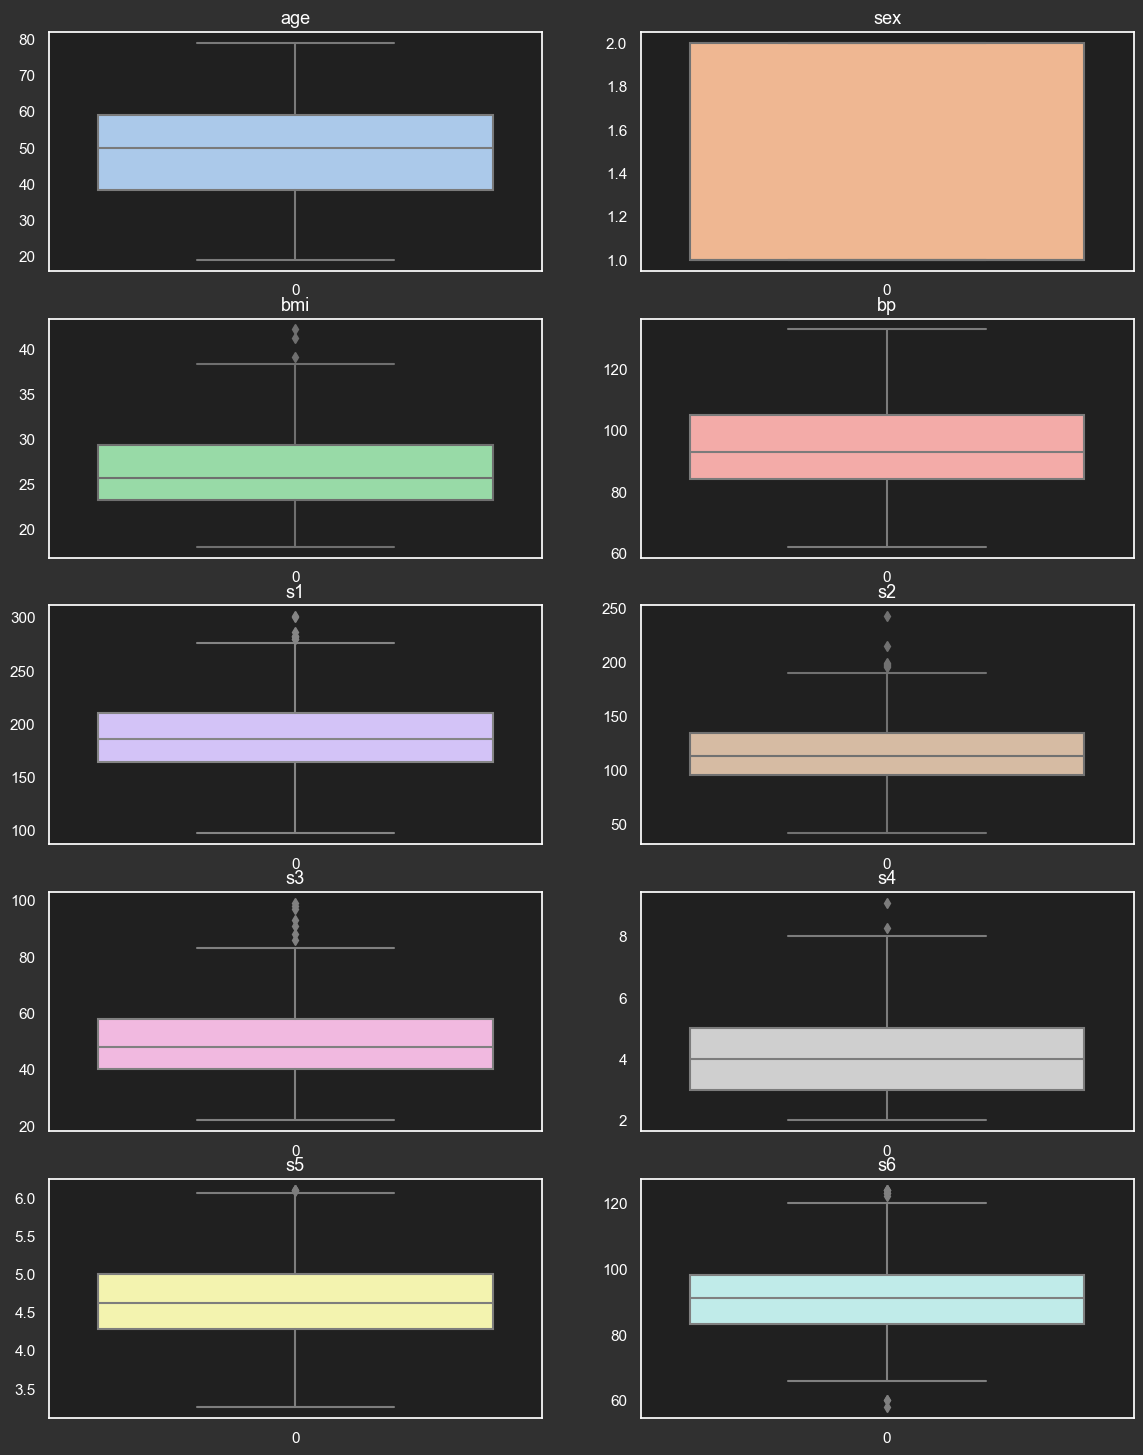

In [12]:
sns.set(style="dark")
fig, axs = plt.subplots(int(len(df.columns)//2), 2, figsize=(14, 18))
fig.patch.set_facecolor('#303030')
index = 0
for i in range(int(len(df.columns)/2)):
    for j in range(2):
        sns.boxplot(data=df.iloc[:,index], ax = axs[i,j], color = sns.color_palette("pastel")[index])
        axs[i, j].set_title(df.columns[index], color='white', fontdict = {'fontsize': 13})
        axs[i, j].set_facecolor('#202020')
        axs[i, j].tick_params(axis='x', colors='white')
        axs[i, j].tick_params(axis='y', colors='white')
        axs[i, j].xaxis.label.set_color('white')
        axs[i, j].yaxis.label.set_color('white')
        axs[i, j].spines['bottom'].set_color('white')
        axs[i, j].spines['left'].set_color('white')
        index+=1
plt.show()


Now we can visual see each feature and how is it distributed.
And we can conclude by the Histograms and the BoxPlots that:
1. Age - We have all kinds of people age when most of them are around 50's years old
2. Gender - We have two types of genders - Male and Female, we can see by the Histogram we have slightly more gender then the other.
3. BMI - Healthy BMI is 18.5 to 24.9. Half the values are below 25 and there are outliers above 40. This suggests that most of our patients might be overweight.
4. Blood Preasure - It appears that most of our patients are in a normal range.

Due to a lack of information on the meanings of the remaining serum measures, I did not analyze them.

It appears that most of them are normally distributed except for feature S4.


#### Solution - Question 1.3

Recreating the dataset with scaled = True

Scaling is important before computing a correlation matrix to ensure all features are comparably measured, enhancing interpretability and preventing scale discrepancies from influencing the analysis.

In [13]:
df = datasets.load_diabetes(return_X_y=True, scaled = True, as_frame=True)[0]

#### Produce a correlation matrix of all the features

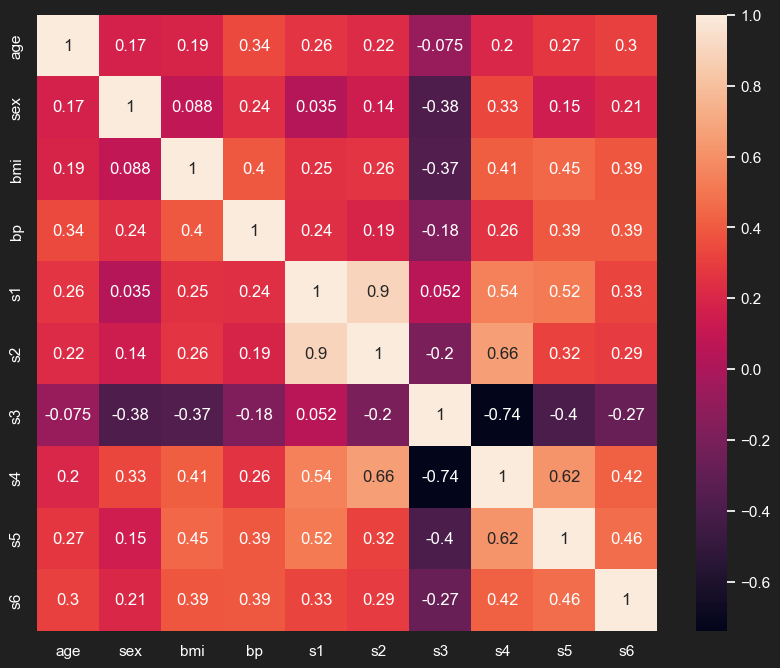

In [14]:
plt.figure(figsize=(10, 8), facecolor='#202020')

heatmap = sns.heatmap(df.corr(), annot = True)

heatmap.tick_params(axis='x', colors='white')
heatmap.tick_params(axis='y', colors='white')

cbar = heatmap.collections[0].colorbar
cbar.ax.set_facecolor('#FFFFFF')
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

plt.xticks(color='white')
plt.yticks(color='white')


plt.show()

##### Are there any correlated features?

Based on the correlation heatmap, we can see that several features are correlated.

We can see that s3 and s4 show a negative correlation with a bold dark color.

Additionally, s1 and s2 are positively correlated.

##### Can you identify one feature with unusual behavior?

The feature with unusual behavior in this heatmap is 's3'.

In the row/column of s3, we can see that s3 has a negative correlation with all the other features, contrary to the majority of features having a positive correlation.

This strong negative correlation is unusual because most other cells show positive correlations.

#### Solution - Question 1.4

Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot).

In [15]:
np.max(np.abs(df.corr()[df.corr()<1]), axis=0).sort_values(ascending = False)[:4]

s1    0.896663
s2    0.896663
s3    0.738493
s4    0.738493
dtype: float64

According to the results, s1 with s2, and s3 with s4 have the highest correlations between the features.

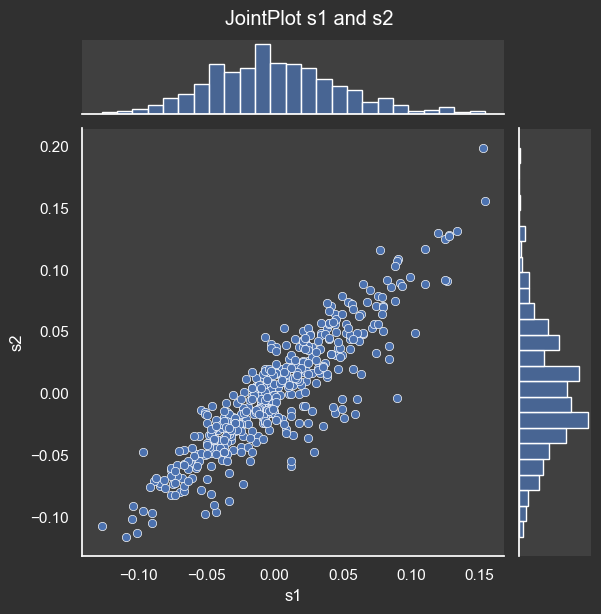

In [16]:
sns.set(style="dark")
joint_plot_s1_s2 = sns.jointplot(data=df, x='s1', y='s2', kind='scatter', marginal_kws=dict(bins=25))
joint_plot_s1_s2.fig.suptitle('JointPlot s1 and s2', y=1.02, color = 'white')
joint_plot_s1_s2.fig.set_facecolor('#202020')
joint_plot_s1_s2.fig.patch.set_facecolor('#303030')
joint_plot_s1_s2.ax_joint.set_facecolor('#404040')
joint_plot_s1_s2.ax_marg_x.set_facecolor('#404040')
joint_plot_s1_s2.ax_marg_y.set_facecolor('#404040')
joint_plot_s1_s2.ax_joint.tick_params(axis='x', colors='white')
joint_plot_s1_s2.ax_joint.tick_params(axis='y', colors='white')
joint_plot_s1_s2.ax_joint.xaxis.label.set_color('white')
joint_plot_s1_s2.ax_joint.yaxis.label.set_color('white')
plt.show()

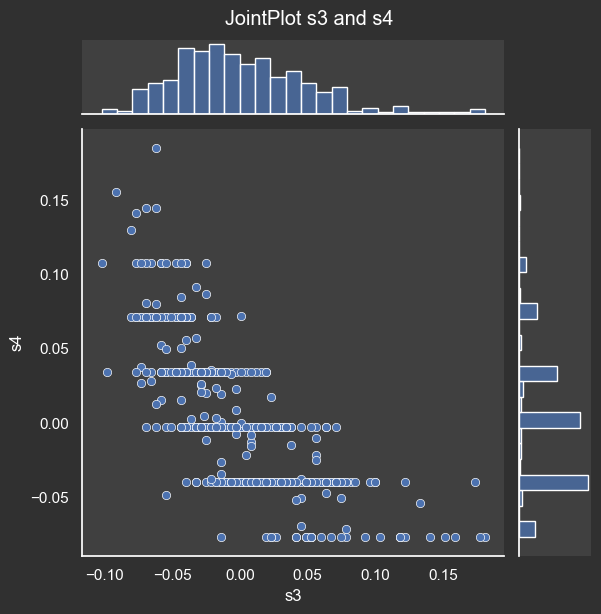

In [17]:
sns.set(style="dark")
joint_plot_s3_s4 = sns.jointplot(data=df, x='s3', y='s4', kind='scatter', marginal_kws=dict(bins=25))
joint_plot_s3_s4.fig.suptitle('JointPlot s3 and s4', y=1.02, color = 'white')
joint_plot_s3_s4.fig.set_facecolor('#202020')
joint_plot_s3_s4.fig.patch.set_facecolor('#303030')
joint_plot_s3_s4.ax_joint.set_facecolor('#404040')
joint_plot_s3_s4.ax_marg_x.set_facecolor('#404040')
joint_plot_s3_s4.ax_marg_y.set_facecolor('#404040')
joint_plot_s3_s4.ax_joint.tick_params(axis='x', colors='white')
joint_plot_s3_s4.ax_joint.tick_params(axis='y', colors='white')
joint_plot_s3_s4.ax_joint.xaxis.label.set_color('white')
joint_plot_s3_s4.ax_joint.yaxis.label.set_color('white')
plt.show()

#### Solution - Question 1.5

Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point.

1. The marginal histogram for s3 (top histogram) shows multiple peaks, which correspond to the clusters observed in the scatter plot.

    This could imply that the variable s3 takes on discrete values or that there are specific groupings or categories within the data.

    If we examing the values that s3 has:

In [18]:
df.s3.value_counts().head(8)

-0.013948    22
-0.043401    19
-0.039719    18
-0.002903    15
-0.032356    15
-0.021311    15
 0.008142    15
-0.028674    15
Name: s3, dtype: int64

We can see that we have multiple repeated values, and that's why we see this odd behavior in the Histograma of s3.

2. The BMI and Blood Pressure are positively correlated, which means that a person's Blood Pressure will increase as their weight exceeds the recommended range.

   The correlation between them and the JoinPlot below shows this.

In [19]:
df[['bmi', 'bp']].corr()

,bmi,bp
bmi,1.000000,0.395411
bp,0.395411,1.000000


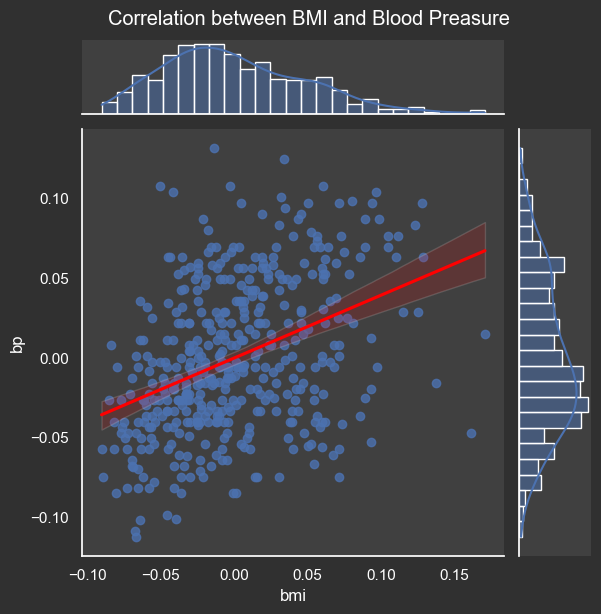

In [20]:
sns.set(style="dark")
joint_plot_bp_bmi = sns.jointplot(data=df, x='bmi', y='bp', kind='reg', marginal_kws=dict(bins=25), color="b", line_kws={"color": "red"})
joint_plot_bp_bmi.fig.suptitle('Correlation between BMI and Blood Preasure', y=1.02, color = 'white')
joint_plot_bp_bmi.fig.set_facecolor('#202020')
joint_plot_bp_bmi.fig.patch.set_facecolor('#303030')
joint_plot_bp_bmi.ax_joint.set_facecolor('#404040')
joint_plot_bp_bmi.ax_marg_x.set_facecolor('#404040')
joint_plot_bp_bmi.ax_marg_y.set_facecolor('#404040')
joint_plot_bp_bmi.ax_joint.tick_params(axis='x', colors='white')
joint_plot_bp_bmi.ax_joint.tick_params(axis='y', colors='white')
joint_plot_bp_bmi.ax_joint.xaxis.label.set_color('white')
joint_plot_bp_bmi.ax_joint.yaxis.label.set_color('white')
plt.show()

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=3$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

#### Solution - Question 2.A

Given:

X - There are n possible outcomes

Y - Can have m possible outcomes

Z - Can have k=3 possible outcomes

Therefore, the number of parameters defining the joint distribution of $X$, $Y$, and $Z$ is:

$$n \times m \times 3 - 1.$$

Since probabilities must sum to 1, one parameter is redundant - degrees of freedom

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

#### Solution - Question 2.B

X, Y, and Z are independent, so the number of parameters is equal to the sum of the marginal distributions:

Number of Parameters Required

$$ (n-1) + (m-1) + (k-1) = (n-1) + (m-1) + (3-1) = n+m $$

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

#### Solution - Question 2.C

* Probabilities for $Z$:
$$ k-1 \text{ parameters for } Z \text{ having } k \text{ outcomes}.$$

* Conditional probabilities for $X$ given $Z$:
$$k \times (n-1) \text{ parameters if } X \text{ has } n \text{ outcomes}.$$
* Conditional probabilities for $Y$ given $Z$:
$$k \times (m-1) \text{ parameters if } Y \text{ has } m \text{ outcomes}.$$

So in conclusion:

$$ (k-1) + k \times (m-1) + k \times (n-1) = $$

$$= (3-1) + 3 \times (m-1) +3 \times (n-1) = $$

$$= 2 + 3m -3 +3n-3 $$

$$ =3n+3m-4$$

#### 2.D
Give an example for a joint distribution of $\ U, V \ $ and $W$ where $U$ and $V$ are NOT conditionally independent given $W$, but $U$ and $V$ are (unconditionally) independent.

Also: $U$ and $V$ are normally distributed ($N(2, 2)$) and $W$ is a coin (2 possible values).

#### Solution - Question 2.D

In [21]:
np.random.seed(42)
n = 10000
mean = 2
std = 2
u_norm = np.random.normal(mean, std, n)
v_norm = np.random.normal(mean, std, n)
w_coin = np.random.choice([0, 1], size=n)

The two variables U and V are independent of one another.

In [22]:
for i in range(n):
    if w_coin[i] == 1:
        v_norm[i] = u_norm[i] + np.random.normal(0, 1)

U and V are independent without considering W. But U and V are not conditionally independent given W.

By simply changing the behavior of the distribution, we will make sure that in case the coin equals 1, then the values in the distribution of v_norm are determined by u_norm.

Therefore, given w, we cannot say that the distribution of v_norm is independent of u_norm.

### Question 3 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 105,000 RCU and a standard deviation of 27,500 RCU.

In [23]:
mean = 105000
std = 27500
X = norm(mean, std)

#### 3.A
What percent of people earn less than 50,000 RCU?

Given the normal distribution $X \sim \mathcal{N}(\mu=105,000, \sigma=27,500)$, to calculate the percentage of people earning less than 50,000 RCU we need to calculate $P(X \leq 50,000)$, and to do that we will calculate the CDF where $x=50,000$, which is 2.27%.

In [24]:
X.cdf(50000)

0.022750131948179195

#### 3.B
What percent of people earn between 50,000 RCU and 77,500 RCU?

Similarly, to calculate the percentage of a range, we would need to calculate the CDF of the larger value (77,500) minus the CDF of the smaller value (50,000). Doing that we will find that 13.59% of the people earn between the range above.

In [25]:
X.cdf(77500) - X.cdf(50000)

0.13590512198327787

#### 3.C
What percent of people earn more than 115,000 RCU?

Since $P(X > 115,000) = 1 - P(X ≤ 115,000)$, we just need to calculate 1 - the CDF of 115,000, which is 35.8%.

In [26]:
1 - X.cdf(115000)

0.35806478442778267

#### 3.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 150,000 RCU?

Like the question above, we would need to compute 1 - the CDF of 150,000, which will give us the percentage of employees earning more than 150,000. Since we know the amount of employees is 1,000, we will multiply the percentage we get by 1,000 and get that ∼50 employees earn more than 150,000 RCU.

In [27]:
n = 1000
n*(1-X.cdf(150000))

50.88175247562887

### Question 4 - CLT for Markov chains

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T =
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

1. In the case of taking the average values of 30 numbers, the CLT implies that as the sample size (in this case, 30) increases, the distribution of sample means will become increasingly closer to a normal distribution. Since in this exercise we are referencing dice rolls with values between 1-6, the average we expect to see is $ \frac{1+2+3+4+5+6}{6}=\frac{21}{6}=3.5 $
2. Below you can see a histogram showing the average values of 1000 trajectories of length 30.
3. The distribution looks like a normal distribution (as it follows the central limit theorem), with a mean of ~3.5. Below you can see the empirical values for the mean and the std.

#### Solution - Question 4.A

In [28]:
T = np.array([[0.4, 0.2, 0.1, 0, 0.1, 0.2],
              [0.2, 0.4, 0.2, 0.1, 0, 0.1],
              [0.1, 0.2, 0.4, 0.2, 0.1, 0],
              [0, 0.1, 0.2, 0.4, 0.2, 0.1],
              [0.1, 0, 0.1, 0.2, 0.4, 0.2],
              [0.2, 0.1, 0, 0.1, 0.2, 0.4]])

x0 = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

In [29]:
def generate_trajectory(T, length):
    trajectory = [np.random.randint(1, 7)]
    while len(trajectory) < length:
        current_state = trajectory[-1] - 1
        next_state = np.random.choice(6, p=T[current_state]) + 1
        trajectory.append(next_state)
    return trajectory

In [30]:
def plot_histogram(data, xname, yname):
    sns.set(style="dark")
    fig = plt.figure()
    ax = fig.add_subplot(111)

    fig.patch.set_facecolor('#303030')
    sns.histplot(data=data, ax=ax, color=sns.color_palette("pastel")[np.random.randint(0, 10)], bins=20, kde=True)


    ax.set_facecolor('#000000')
    fig.set_facecolor('#202020')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')

    plt.title('Histogram of Average Values')
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.tight_layout()
    plt.show()

In [31]:
trajectories = [generate_trajectory(T, length=30) for _ in range(1000)]
average_values = [np.mean(trajectory) for trajectory in trajectories]
print(f'The empirical mean is {np.mean(average_values)}, and the empirical std is {np.std(average_values)}')

The empirical mean is 3.5168666666666666, and the empirical std is 0.4748496416995829


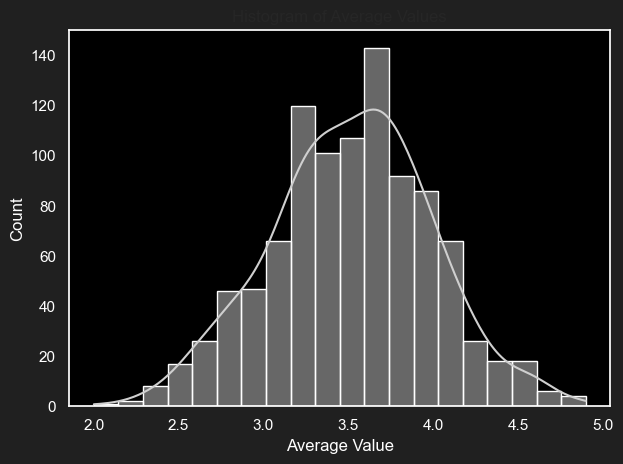

In [32]:
plot_histogram(average_values, 'Average Value', 'Count')

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?
4. Draw normal fit curves on your two histograms.

#### Solution - Question 4.B

1. For the same reasons mentioned in 4.A.1, we expect the average value of all 500 numbers in a trajectory to be 3.5.
2. Below is a histogram showing the average value of 1000 trajectories of length 500.
3. Like in 4A, the distribution looks like a normal distribution, following the CLT, with a mean of ~3.5. Below you can see the empirical values for the mean and the std.

In [33]:
trajectories = [generate_trajectory(T, length=500) for _ in range(1000)]
average_values = [np.mean(trajectory) for trajectory in trajectories]
print(f'The empirical mean is {np.mean(average_values)}, and the empirical std is {np.std(average_values)}')

The empirical mean is 3.5033060000000003, and the empirical std is 0.12108292350286229


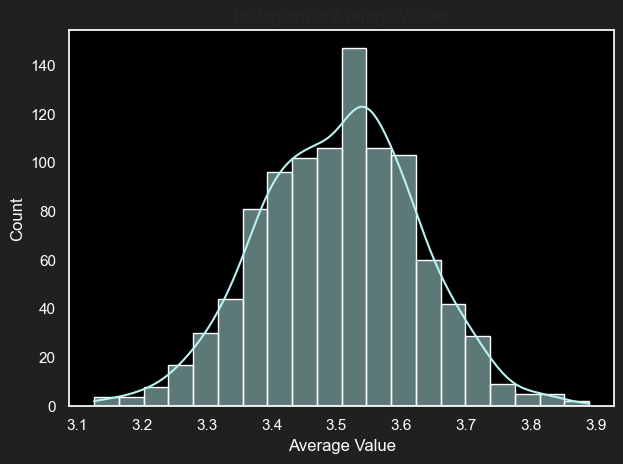

In [34]:
plot_histogram(average_values, 'Average Value', 'Count')

#### 4.C
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$.

Compute the values for our case.

#### Solution - Question 4.C

Reminder - we showed in class that $X_i ∼ π_0 \cdot T^{i-1}$.

In order to calculate $Cov(X_0, X_i)$ for $i=1,...,500$, we'll use the following formula: $$Cov(X_0, X_i)=E[X_0 ⋅ X_i] - E[X_0]\cdot E[X_i]$$

In [35]:
def calc_cov(n):
    covs = np.zeros(n)
    dice = np.array([1, 2, 3, 4, 5, 6])

    E_X0 = x0 @ dice
    pi = x0

    for i in range(n):
        pi = pi @ T
        E_Xi = pi @ dice
        E_X0Xi = 0

        for d1 in dice:
            for d2 in dice:
                E_X0Xi += (d1 * x0[d1-1]) * (d2 * matrix_power(T, i)[d1-1][d2-1])

        covs[i] = E_X0Xi - E_X0 * E_Xi

    return covs

In [36]:
calc_cov(500)

array([2.91666667e+00, 1.11666667e+00, 5.16666667e-01, 2.52666667e-01,
       1.25466667e-01, 6.25866667e-02, 3.12666667e-02, 1.56282667e-02,
       7.81314667e-03, 3.90637867e-03, 1.95315067e-03, 9.76567627e-04,
       4.88282275e-04, 2.44140830e-04, 1.22070353e-04, 6.10351645e-05,
       3.05175798e-05, 1.52587894e-05, 7.62939461e-06, 3.81469729e-06,
       1.90734865e-06, 9.53674331e-07, 4.76837172e-07, 2.38418595e-07,
       1.19209302e-07, 5.96046590e-08, 2.98023384e-08, 1.49011790e-08,
       7.45060014e-09, 3.72530984e-09, 1.86266291e-09, 9.31340338e-10,
       4.65682604e-10, 2.32850184e-10, 1.16436638e-10, 5.82307536e-11,
       2.91269231e-11, 1.45750079e-11, 7.30082661e-12, 3.66284780e-12,
       1.84385840e-12, 9.34363698e-13, 4.79616347e-13, 2.55795385e-13,
       1.40332190e-13, 8.17124146e-14, 5.50670620e-14, 4.61852778e-14,
       3.90798505e-14, 3.90798505e-14, 3.19744231e-14, 3.19744231e-14,
       3.37507799e-14, 3.55271368e-14, 3.55271368e-14, 3.55271368e-14,
      

### Question 5 - Distributions

Let $X$ be a random variable. Consider the number $q$ so that $P(X\le q)=0.8$ (assume that such a value exists).

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Denote the sorted observations by: $a_1 \le a_2 \le ... \le a_n$.

Also assume that $n \ge 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $a_i \le q$.

If $a_1 > q$ then $R = 0$.

1. What is $P(R = 0)$?
1. What is the distribution of $R$?
1. Given $n$, write code that computes an index $\lambda (n)$ so that $P(a_{\lambda (n)} \le q) \ge 0.9$ and $P(a_{\lambda (n)+1} \le q) < 0.9$.
1. Let $X \sim Unif(0,1)$, $q$ as above and $n=100$. Compute $\lambda (n)$ as above. Run 200 experiments that calculate $a_{\lambda (n)}$ for independent drawing from $X$. How many times did you observe $a_{\lambda (n)} \le q$?

#### Solution - Question 5.1

First thing to notice is that by definition, $\forall 1 \le i \le n: R=i$, it means that there are exactly $i$ elements that are $\le q$. In other words, $i$ is the number of successes.

secondly, we notice that every $x_i$ that is sampled from $X$ is actually a bernoulli random variable with $p=0.8$. Now, since $x_1, ..., x_n$ are independent, we get that $R∼Binom(n, p=0.8)$

Next, we can see that $R=0 ⟺ \forall i: x_i > q$, which leads us to the following calculation:

$P(R=0)= {n \choose 0} \cdot p^0 \cdot (1-p)^n=(1-p)^n=0.2^n$


#### Solution - Question 5.2

As mentioned above, $\mathbf{R \sim bin(n,p=0.8)}$ is distributed binomially with $p=0.8$.

#### Solution - Question 5.3

We can see that $\lambda$ is the index for which there are $\lambda$ successes, or mathematically, $P(a_{\lambda(n)}\le q) = P(R \ge \lambda(n))$.

In other words, $\lambda(n)$ is the value for which $$[P(a_{\lambda(n)}\le q)\ge 0.9] \land [P(a_{\lambda(n)+1}\le q)< 0.9] = $$
$$[P(R \ge \lambda(n)) \ge 0.9] \land [P(R \ge \lambda(n)+1) < 0.9] =$$
$$[1-CDF_R(\lambda(n)) \ge 0.9] \land [1-CDF_R(\lambda(n)+1) < 0.9]$$

Where as the latter is easy to compute using scipy's cdf function.

In [37]:
def calc_lambda(n, p, thresh):
    X = binom(n, p)
    i = 0
    while True:
        if 1-X.cdf(i) >= thresh and 1-X.cdf(i+1) < thresh:
            return i
        i += 1

In [38]:
calc_lambda(100, 0.8, 0.9)

74

#### Solution - Question 5.4

computing $\lambda(n)$ for ${n=100}$ and for the same $q$ (for which we have: ${P(X \leq q) = 0.8}$):

In [ ]:
lambda_n = calc_lambda(n=100, p = 0.8, thresh = 0.9) + 1
lambda_n

75

In [66]:
n = 100
q = 0.8
experiments = 200 
count = 0

for i in range(experiments):
    sample = uniform.rvs(size=n)
    if (sorted(sample))[lambda_n-1] <= q:
        count+=1
count

185

We got that 185 experiments had ${a_\lambda(n) \leq 0.8}$.